There are two main types of hierarchical clustering:

1. Agglomerative (Bottom-Up) – Start with each data point as its own cluster and merge them iteratively.
2. Divisive (Top-Down) – Start with all data points in one cluster and split them iteratively.

# Agglomerative

1. Step 1: Compute the Distance Matrix
    - First, calculate the distance (or dissimilarity) between each pair of data points.
    - Common distance metrics: Euclidean distance, Manhattan distance, Cosine similarity, etc.
    - Store these distances in a distance matrix.
2. Step 2: Start with Each Point as Its Own Cluster
    - Initially, each data point is considered its own cluster.
    - So, if there are N data points, we start with N clusters.
3. Step 3: Merge the Closest Clusters
    - Find the two closest clusters based on their distance.
    - Merge them into a new cluster.
    - Update the distance matrix to reflect the new cluster.
4. Step 4: Update Distance Matrix (Linkage Method)

    - The way we measure the distance between clusters depends on the linkage method:
    - Single Linkage: Distance between the closest points of two clusters.
    - Complete Linkage: Distance between the farthest points of two clusters.
    - Average Linkage: Average distance between all points in the two clusters.
    - Centroid Linkage: Distance between the centroids (mean points) of two clusters.
5. Step 5: Repeat Until One Cluster Remains

    - Keep merging the closest clusters step by step.
    - Stop when all points are in a single cluster.
    - The process creates a hierarchical tree (dendrogram).
6. Step 6: Choose the Optimal Number of Clusters
    - Cut the dendrogram at a certain level to decide the number of clusters.
    - The number of clusters can be chosen manually by analyzing the dendrogram or using a threshold.

## Use case
1. $O(N^3) $ complexity, hence used for small datasets
2. When clusters aren’t well-separated but still hierarchical: Think of social networks or document classification, where clusters have sub-clusters.

## Scipy's implementation

Distance Matrix:
 [[0.         0.5017136  0.82421549 0.32755369 0.33198071 0.35447574]
 [0.5017136  0.         0.72642889 0.72506609 0.17058938 0.8024531 ]
 [0.82421549 0.72642889 0.         0.71690251 0.7091551  0.8251064 ]
 [0.32755369 0.72506609 0.71690251 0.         0.56557921 0.11030352]
 [0.33198071 0.17058938 0.7091551  0.56557921 0.         0.63684727]
 [0.35447574 0.8024531  0.8251064  0.11030352 0.63684727 0.        ]]


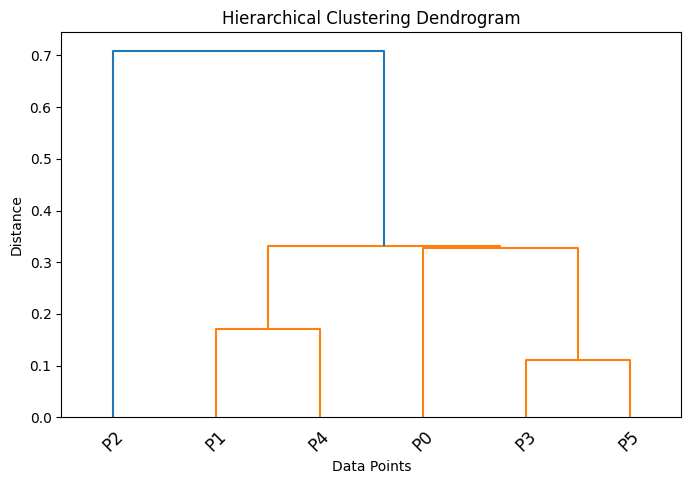

In [4]:
import numpy as np
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Generate sample data
np.random.seed(42)
X = np.random.rand(6, 2)  # 6 data points in 2D space

# Step 1: Compute Distance Matrix
distance_matrix = dist.pdist(X, metric='euclidean')  # Pairwise distances
distance_matrix = dist.squareform(distance_matrix)  # Convert to matrix form
print("Distance Matrix:\n", distance_matrix)

# Step 2-5: Perform Hierarchical Clustering using linkage
linkage_matrix = sch.linkage(X, method='single')  # Single linkage method

# Step 6: Plot the Dendrogram
plt.figure(figsize=(8, 5))
sch.dendrogram(linkage_matrix, labels=[f"P{i}" for i in range(len(X))], 
               leaf_rotation=45, leaf_font_size=12)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()
